## Wine Quality Prediction

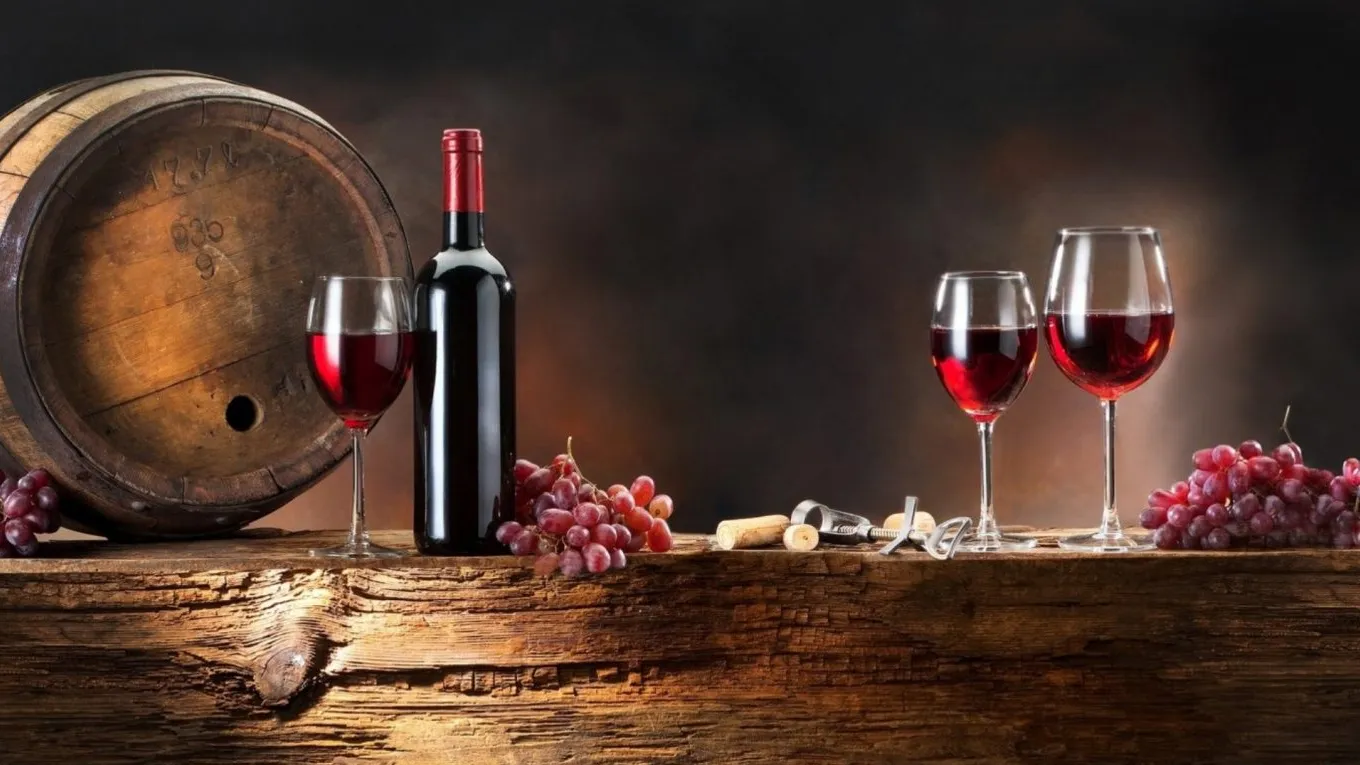

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [4]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.tolist()
    return high_correlations
     

features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=3)

In [6]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.coef_)

[ 0.01773723 -0.99256049 -0.13962865 -1.59094279  0.00559652 -0.00351973
  0.76859036 -0.43741414  0.81288805  0.30148385]


In [7]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test)
print(test_pred)

[5.33777144 5.33826411 5.9503318  ... 6.3903182  6.19979375 5.27597259]
[5.10801475 5.65933623 5.90407267 6.13461179 5.00611866 5.44514691
 5.05735245 6.15497513 5.51919603 5.77259374 5.61809366 5.23616173
 5.23544213 5.31968644 6.47007277 5.043404   5.85287121 5.19427909
 6.07727089 6.34949018 6.42525555 5.51221957 5.8030796  4.93637817
 5.16618356 5.48255293 5.13758624 6.60000969 5.88754763 5.74133915
 6.09716961 6.29379754 4.91269821 5.88611904 5.11007273 5.94574773
 6.80685536 5.04305653 5.25438683 5.88611904 5.17406542 4.84008442
 6.48781656 5.40521715 5.31105571 5.84484462 5.7100681  5.24300809
 5.25021217 5.46398911 5.08740494 5.61369555 6.01375792 6.32497377
 5.47511954 5.36466869 5.09234555 4.92625623 5.21415941 5.08274744
 4.79570013 5.4377645  5.25237771 5.68830391 5.85145609 6.52420079
 5.38691412 5.71775637 5.17641417 5.99156845 5.6445189  5.60892012
 5.74967567 5.21702288 5.97975854 5.51115845 5.41121547 5.6832459
 5.63971524 5.74133915 6.24163428 5.27915822 4.66596769 6.

In [8]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

0.6525240995946502
0.6275381539226501
[5. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 5. 6. 5. 6. 7. 5. 5. 6. 5. 5. 6. 5. 5. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 6. 6. 6. 5. 5. 6. 7. 5. 5.
 6. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5.
 5. 6. 6. 7. 5. 6. 6. 5. 6. 6. 5. 6. 7. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7.
 5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 6. 5. 7. 5. 5. 6. 6. 5. 6. 7. 7. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 

In [9]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.017737
volatile acidity        -0.992560
citric acid             -0.139629
chlorides               -1.590943
free sulfur dioxide      0.005597
total sulfur dioxide    -0.003520
density                  0.768590
pH                      -0.437414
sulphates                0.812888
alcohol                  0.301484
